In [1]:
import torch  #Construir y entrenar redes neuronales
import torch.nn as nn  #Definir arquitecturas de redes neuronales
import torch.optim as optim  #Optimizadores de entrenamiento
import pandas as pd  #Manipulación de datos tabulares
import numpy as np  #Operaciones numéricas
from sklearn.model_selection import train_test_split  #Dividir datos en conjuntos de entrenamiento y prueba
from sklearn.preprocessing import StandardScaler  #Normalizacion de datos
import matplotlib.pyplot as plt  # Matplotlib para visualizar resultados y gráficos

In [2]:
#Lectura de datos
data = pd.read_csv('soybean_JUL14_Clean_File.csv')

data = data.dropna()
data = data.fillna(0)

y = data[['TotalOpenInt']]
X = data.drop(columns=['TotalOpenInt'])

# Convierte las columnas a arreglos numpy
X = X.to_numpy(dtype=np.float32)
y = y.to_numpy(dtype=np.float32)

# Normalizar los datos
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

# Convierte los datos de numpy a tensores de PyTorch
X = torch.tensor(X)
y = torch.tensor(y)

In [3]:
# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

En esta clase llamada "RegresionLineal", se define un modelo de regresión lineal utilizando PyTorch.
El constructor "__init__" toma dos argumentos: "input_size" y "output_size", que representan las dimensiones de entrada y salida del modelo.
Dentro del constructor, se crea una capa lineal (nn.Linear) que mapea "input_size" características de entrada a "output_size" características de salida.
La función "forward" define cómo se realiza la propagación hacia adelante en el modelo, simplemente aplicando la capa lineal a las entradas.

In [4]:
# Definición de una clase para un modelo de regresión lineal en PyTorch

class RegresionLineal(nn.Module):
    def __init__(self, input_size, output_size):
        super(RegresionLineal, self).__init__()
        self.linear = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.linear(x)
# Dimensiones de entrada y salida del modelo
input_size = X.shape[1]  # El número de características en X
output_size = 1  # Una sola salida en el modelo de regresión lineal


In [5]:
# Crear una instancia del modelo
modelo = RegresionLineal(input_size, output_size)

"modelo.parameters()" se utiliza para obtener los parámetros entrenables del modelo.
"lr=0.01" establece la tasa de aprendizaje, que controla el tamaño de los pasos de actualización durante el entrenamiento.

In [6]:
# Definición de la función de pérdida (criterio) y el optimizador para el modelo de regresión lineal

criterio = nn.MSELoss()  # Error cuadrático medio (MSE): Se utiliza para medir la discrepancia entre las predicciones y los valores reales.
optimizador = optim.SGD(modelo.parameters(), lr=0.01)  # Descenso de gradiente estocástico (SGD): Un algoritmo de optimización para ajustar los pesos del modelo durante el entrenamiento.

En este bucle de entrenamiento, se realizan los siguientes pasos en cada época:
1. Se calculan las predicciones del modelo en el conjunto de entrenamiento (propagación hacia adelante).
2. Se calcula la pérdida utilizando la función de pérdida (criterio).
3. Se reinician los gradientes del optimizador.
4. Se calculan los gradientes retropropagando la pérdida a través del modelo (retropropagación).
5. Se actualizan los pesos del modelo utilizando el optimizador.
6. Se imprime la pérdida cada 100 épocas para monitorear el progreso del entrenamiento.

In [7]:
# Entrenamiento del modelo de regresión lineal

num_epochs = 1000  # Número de épocas de entrenamiento
for epoch in range(num_epochs):
    # Forward pass (propagación hacia adelante)
    outputs = modelo(X_train)  # Calcular las predicciones del modelo en el conjunto de entrenamiento
    loss = criterio(outputs, y_train)  # Calcular la pérdida utilizando la función de pérdida (criterio)

    # Backward pass (retropropagación) y optimización
    optimizador.zero_grad()  # Reiniciar gradientes
    loss.backward()  # Calcular gradientes retropropagando la pérdida
    optimizador.step()  # Actualizar los pesos del modelo usando el optimizador

    if (epoch + 1) % 100 == 0:
        print(f'Época [{epoch + 1}/{num_epochs}], Pérdida: {loss.item():.4f}')



Época [100/1000], Pérdida: 0.9437
Época [200/1000], Pérdida: 0.9250
Época [300/1000], Pérdida: 0.9166
Época [400/1000], Pérdida: 0.9119
Época [500/1000], Pérdida: 0.9093
Época [600/1000], Pérdida: 0.9077
Época [700/1000], Pérdida: 0.9069
Época [800/1000], Pérdida: 0.9063
Época [900/1000], Pérdida: 0.9060
Época [1000/1000], Pérdida: 0.9058


En este bloque de código, se evalúa el modelo en el conjunto de prueba después del entrenamiento.
Se coloca el modelo en modo de evaluación para desactivar el seguimiento de gradientes y luego se calculan las predicciones en el conjunto de prueba.
Las predicciones se imprimen en la consola para su visualización.
Esto permite ver cómo el modelo está haciendo predicciones en datos no vistos sin afectar los pesos del modelo.

In [8]:
# Evaluación del modelo en el conjunto de prueba

modelo.eval()  # Poner el modelo en modo de evaluación (desactivar el seguimiento de gradientes)
with torch.no_grad():  # Temporalmente deshabilitar el cálculo de gradientes
    predicciones = modelo(X_test)  # Calcular predicciones en el conjunto de prueba sin realizar seguimiento de gradientes

    # Imprimir las predicciones en el conjunto de prueba
    print("Predicciones en el conjunto de prueba:")
    print(predicciones)

Predicciones en el conjunto de prueba:
tensor([[ 1.2446e-01],
        [-2.5752e-01],
        [ 1.0990e-01],
        [ 1.4820e-01],
        [-4.1459e-02],
        [-2.8969e-01],
        [-1.4362e-01],
        [ 4.4621e-04],
        [-6.1024e-02],
        [ 4.2011e-01],
        [ 9.9947e-02],
        [-3.3715e-01],
        [-2.8157e-01],
        [-6.9056e-03],
        [ 4.8633e-02],
        [ 6.7854e-02],
        [ 2.3231e-02],
        [-3.2081e-01],
        [-2.6028e-01],
        [ 1.4290e-01],
        [ 7.3508e-02],
        [ 9.0899e-02],
        [ 4.2588e-03],
        [ 1.1180e-01],
        [-1.9243e-02],
        [ 4.0899e-01],
        [-8.8254e-02],
        [-2.7288e-01],
        [-1.3179e-01],
        [ 1.4354e-02],
        [ 5.6782e-02],
        [ 1.1560e-01],
        [-2.3210e-02],
        [-4.7625e-02],
        [-2.4509e-01],
        [-3.1535e-02],
        [ 2.4994e-01],
        [ 1.4777e-01],
        [ 1.9407e-01],
        [-2.4089e-02],
        [-1.8338e-01],
        [ 2.7276e-

En este bloque de código, se evalúa el modelo en el conjunto de prueba y se crea un gráfico de dispersión para comparar los valores reales y las predicciones del modelo.
Se revierten las operaciones de normalización (inversa de la normalización) para obtener valores reales en la misma escala que los datos originales.
Luego, se crea un gráfico de dispersión que muestra los valores reales en el eje x y las predicciones en el eje y.
La línea roja representa una regresión lineal ideal donde los valores reales y las predicciones serían idénticos.

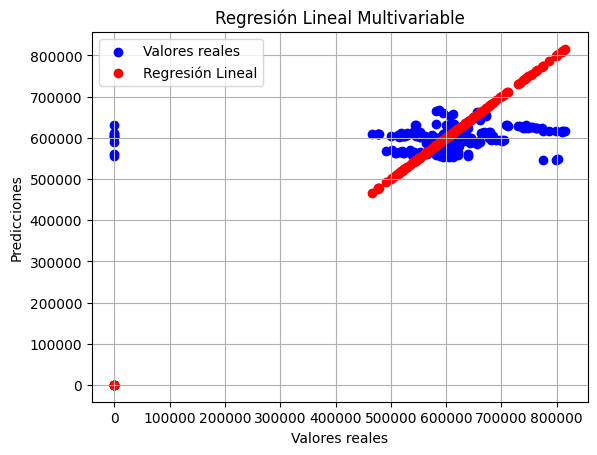

In [9]:
# Evaluación del modelo en el conjunto de prueba y creación de un gráfico de dispersión

modelo.eval()  # Poner el modelo en modo de evaluación (desactivar el seguimiento de gradientes)
with torch.no_grad():  # Temporalmente deshabilitar el cálculo de gradientes
    predicciones = modelo(X_test)  # Calcular predicciones en el conjunto de prueba

    # Inversa de la normalización para obtener valores reales
    predicciones = scaler_y.inverse_transform(predicciones)  # Predicciones del modelo
    y_test = scaler_y.inverse_transform(y_test)  # Valores reales

# Crear un gráfico de dispersión para comparar valores reales y predicciones
plt.scatter(y_test, predicciones, label='Valores reales', color='blue')  # Valores reales vs. Predicciones
plt.scatter(y_test, y_test, label='Regresión Lineal', color='red', marker='o')  # Línea de regresión ideal
plt.xlabel("Valores reales")
plt.ylabel("Predicciones")
plt.title("Regresión Lineal Multivariable")
plt.legend()
plt.grid(True)
plt.show()